In [1]:
from OpenMiChroM.ChromDynamics import MiChroM
from openmmtools import integrators
from simtk import unit
from Custom_integrators import CustomBrownianIntegrator
import Custom_Bonds
import numpy as np
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.colors as colors
# from matplotlib.animation import FuncAnimation
# import matplotlib.pyplot as plt
# from matplotlib import rcParams as rc

In [24]:
ftop='chr_top.txt'
fseq='chr_seq.txt'
finit=''#'snap.npy'

Ta=400
Na=0
T=100
F=0.0
Esoft=10

R0=50
gamma=0.1
kb=1
dt=1e-3
nblocks=100
blocksize=800
opath='test_out/'
savename='test'

In [25]:
#==========================#
#Initialize Michrom Class  #
#==========================#
sim=MiChroM(name=savename, velocity_reinitialize=False,temperature=T)

#Specify integrator
integrator=CustomBrownianIntegrator(
                    timestep=dt * unit.picoseconds, 
                    collision_rate=gamma / unit.picoseconds,
                    temperature=T * unit.kelvin,measure_heat=False,
                    noise_corr=Ta * unit.picoseconds,
                    )

sim.setup(platform="opencl",integrator=integrator,)
sim.saveFolder(opath)

#Initial structure (spiral by default)
if '.npy' not in finit:
    chrm=sim.create_springSpiral(ChromSeq=fseq)
else:
    chrm=np.load(finit)
sim.loadStructure(chrm,center=True)
sim._translate_type(fseq)


    ***************************************************************************************     
     **** **** *** *** *** *** *** *** OpenMiChroM-1.0.2 *** *** *** *** *** *** **** ****      

         OpenMiChroM is a Python library for performing chromatin dynamics simulations.         
                            OpenMiChroM uses the OpenMM Python API,                             
                employing the MiChroM (Minimal Chromatin Model) energy function.                
      The chromatin dynamics simulations generate an ensemble of 3D chromosomal structures      
      that are consistent with experimental Hi-C maps, also allows simulations of a single      
                 or multiple chromosome chain using High-Performance Computing                  
                            in different platforms (GPUs and CPUs).                             
         OpenMiChroM documentation is available at https://open-michrom.readthedocs.io          

         OpenMiChroM is desc

In [26]:
Custom_Bonds.set_activity(sim,F_act=1, particle_list=range(50))


##---------#
##polymers #
##---------#

#chromosome topology
chrm_top=np.loadtxt(ftop, delimiter=' ', dtype=int)
# sim.forceDict['HarmonicBond']=sim.mm.HarmonicBondForce()
##add bonds between nearest neighbors
for ii in range(sim.N-1):
    #skip bonds between different chromosomes
    if ii in chrm_top[:,1]: continue
    Custom_Bonds.addFENEBond(sim, ii, ii+1,kfb=20)
    # Custom_Bonds.addTanhHarmonicBond(sim, ii, ii+1, eh=20, kb=kb)
    # print(ii)
    # sim.forceDict['HarmonicBond'].addBond(ii,ii+1, 2, 1)
    # sim.bondsForException.append((int(ii), int(ii+1)))
    # Custom_Bonds.addHarmonicBond(sim, ii, ii+1, kb=kb, d=2) 

Custom_Bonds.addRadialConfinement(sim, R0=R0, FlatBottomHarmonic=True, kr=50)

#=====================#
# Soft-core repulsion #
#=====================#
# Custom_Bonds.addTanhRepulsion(sim, es=4,rc=1)

#=========================#
# Inter-monomer adhesion  #
#=========================#
# sim.addCustomTypes(mu=3, rc=1, TypesTable='type_table.csv')
# Custom_Bonds.LJRepulsion(sim)
# Custom_Bonds.HarmonicRepulsion(sim,k0=30,r0=1.)
# Custom_Bonds.TypesAdhesionGaussian(sim,rc=1.,TypesTable='type_table.csv')
# Custom_Bonds.addCustomTypes(sim,rc=2,TypesTable='type_table.csv')


Implementing Flat-Bottom Harmonic confinement:
 Radius: 50.00 
 Volume fraction: 0.000 
 Stiffness: 50.00


True

In [27]:
for key in sim.forceDict:
    print(key, sim.forceDict[key].getForceGroup())#,sim.forceDict[key].getNumParticles(),)
#     sim.forceDict[key].getNumPerParticleParameters(),sim.forceDict[key].getParticleParameters(70))
# print(sim.forceDict['CustomTypes'].getParticleParameters(200))
# print(sim.forceDict['ActiveForce'].getNumParticles())
# sim.forceDict['HarmonicBond'].getGlobalParameterDefaultValue(1,)
# sim.forceDict['HarmonicBond'].getNumBonds()
# sim.forceDict['HarmonicBond'].getNumGlobalParameters()
# print(chrm_top.shape)

ActiveForce 0
FENEBond 0
RadialConfinement 0


In [28]:
positions=[]
for ii, _ in enumerate(range(nblocks)):
    sim.runSimBlock(blocksize)
    #sim.saveStructure()

    state = sim.context.getState(getPositions=True,
            getVelocities=False, getEnergy=False)
    #vel = state.getVelocities(asNumpy=True)#/unit.sqrt(unit.kilojoule_per_mole / mass)
    positions.append(state.getPositions(asNumpy=True))
#     sim.printForces()
#     print(sim.state.getPotentialEnergy(), sim.kB*T*unit.kelvin)
    
    # if ii%int(args.nblocks*0.1)==0 and ii>0==0:
    if ii==500:
        np.save(opath+'traj_'+savename+'_positions.npy',np.array(positions))
        print('saved')
#save cndb file
#sim.storage[0].close()

#np.save(args.opath+savename+'_velocities.npy',Velocities)
np.save(opath+'traj_'+savename+'_positions.npy',np.array(positions))

Number of exceptions: 0
adding force  ActiveForce 0
adding force  FENEBond 1
adding force  RadialConfinement 2
Positions... 
 loaded!
potential energy is 7.781780
bl=1 pos[1]=[4.5 2.3 1.2] dr=2.74 t=0.0ps kin=3.18 pot=-0.89 Rg=5.577 SPS=1477 
bl=2 pos[1]=[5.3 1.7 -1.3] dr=2.12 t=0.0ps kin=7.00 pot=-0.98 Rg=6.180 SPS=2456 
bl=3 pos[1]=[5.9 3.0 -2.5] dr=1.44 t=0.0ps kin=9.16 pot=-1.11 Rg=6.462 SPS=2483 
bl=4 pos[1]=[5.0 5.4 -2.1] dr=1.71 t=0.0ps kin=11.60 pot=-2.12 Rg=6.703 SPS=2477 
bl=5 pos[1]=[6.8 5.7 -0.0] dr=1.95 t=0.0ps kin=14.61 pot=-2.49 Rg=6.769 SPS=2512 
bl=6 pos[1]=[6.4 4.9 -1.1] dr=1.70 t=0.0ps kin=18.74 pot=-2.13 Rg=6.533 SPS=2549 
bl=7 pos[1]=[6.9 4.5 -1.1] dr=1.56 t=0.0ps kin=21.23 pot=-2.60 Rg=7.006 SPS=2538 
bl=8 pos[1]=[4.8 4.7 -2.6] dr=1.28 t=0.0ps kin=24.24 pot=-1.94 Rg=6.638 SPS=2523 
bl=9 pos[1]=[6.7 4.3 -3.6] dr=1.54 t=0.0ps kin=24.93 pot=-1.85 Rg=6.565 SPS=2545 
bl=10 pos[1]=[5.2 4.4 -4.2] dr=1.99 t=0.0ps kin=28.15 pot=-2.45 Rg=6.416 SPS=2533 
bl=11 pos[1]=[5.6 4.

In [7]:
xyz=np.load(opath+'traj_'+savename+'_positions.npy')
print(xyz.shape)

(200, 100, 3)


In [8]:
np.save('snap.npy',xyz[-1])

In [7]:
%matplotlib ipympl
fig = plt.figure()
ax = fig.add_axes([0,0,2,2],projection='3d')
# ax = fig.add_axes([0,0,1,1],)
# quiver = ax.quiver([],[],[],[])
#quiver = ax.quiver([],[],[],[],[],[])
R0=100
Na=400
ax.scatter(xyz[0,:Na,0],xyz[0,:Na,1],xyz[0,:Na,2],'o',color='C0')
ax.scatter(xyz[0,Na:,0],xyz[0,Na:,1],xyz[0,Na:,2],'o',color='C1')
# c=['r','g','b']
def update(ii):
    fig.clear()
    ax = fig.add_axes([0,0,1,1],projection='3d')
    # ax = fig.add_axes([0,0,1,1],)

    p=xyz[ii]
    # print(p.shape)
    # line.set_data(p[:,0],p[:,1])
    # line.set_3d_properties(p[:,2])
    # plt.draw()
    # ax.plot(p[10:13,0],p[10:13,1],p[10:13,2],'o',color='C0',alpha=1)
    ax.scatter(p[:Na,0],p[:Na,1],p[:Na,2],'o',color='C0',alpha=0.5)

    # ax.plot(p[300:303,0],p[300:303,1],p[300:303,2],'o',color='C1',alpha=1)
    ax.scatter(p[Na:,0],p[Na:,1],p[Na:,2],'o',color='C1',)
    ax.plot(p[Na:,0],p[Na:,1],p[Na:,2],'-',color='k',)
    # ax.plot(masked_xyz[:100,0],masked_xyz[:100,1],'go',markersize=3)
    
    ax.set_zlim(-R0, R0)
    ax.set_xlim(-R0, R0)
    ax.set_ylim(-R0, R0)
    
    # return line,

#update(10)
ani = FuncAnimation(fig, update, frames=np.arange(1,xyz.shape[0],5), interval=200, blit=True,repeat=False)

# ani.save('ani_sticky_gas_T0.1_F0.1_Ta10-R20.gif', writer='pillow')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [87]:
def autocorrFFT(x):
    Nx=len(x)
    F = np.fft.fft(x, n=2*Nx)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    res = np.fft.ifft(PSD)
    res= (res[:Nx]).real   #now we have the autocorrelation in convention B
    n=Nx*np.ones(Nx)-np.arange(0,Nx) #divide res(m) by (N-m)
    return res/n #this is the autocorrelation in convention A
    
def msd_fft(r):
    Nx=len(r)
    D=np.square(r).sum(axis=1) 
    D=np.append(D,0) 
    S2=sum([autocorrFFT(r[:, i]) for i in range(r.shape[1])])
    Q=2*D.sum()
    S1=np.zeros(Nx)
    for m in range(Nx):
        Q=Q-D[m-1]-D[Nx-m]
        S1[m]=Q/(Nx-m)
    return S1,S2

def tau_p(p1,k1,Nn):
    g=0.1
    return g*Nn**2/(np.pi**2*k1*p1**2)
    
def tau_charac(k1):
    g=0.1
    return g/(np.pi**2*k1)

def XP_autocorr(t,p1,T1,F1,ta,k1,Nn):
    g=0.1
    tp=tau_p(p1,k1,Nn)
    r=1-ta**2/tp**2
    ret = ((3*tp/(2*Nn*g))*(T1+F1**2*ta/(g*r))*np.exp(-t/tp) 
            - (3*F1**2*ta**2/(2*Nn*g**2*r))*np.exp(-t/ta))
    # ret=((3*temp*tp/(2*Nn*g))*np.exp(-t/tp)
    #         + (3*(F1*tp*ta)**2/(2*Nn*g**2*(tp**2-ta**2)))*(tp*np.exp(-t/tp)/ta + np.exp(-t/ta)))
    return ret

def Rot_corr(t,T1,F1,ta,k1,Nn):
    #scalar t
    ps=np.arange(1,Nn,1)
    ret=XP_autocorr(t,ps,T1,F1,ta,k1,Nn)*(1+np.cos(ps*np.pi/Nn)**2-2*np.cos(ps*np.pi)*np.cos(np.pi*ps/Nn))
    return np.mean(ret)

def dXp_autocorr(t,p1,T1,F1,ta,k1,Nn):
    #scalar t
    c=0
    tp=tau_p(p1,k1,Nn)
    g=0.1
    if t<1e-8: c=T1/(Nn*g)

    # ret=c-T1*np.exp(-t/tp)/(2*Nn*g*tp)
    ret=(c+XP_autocorr(t,p1,T1,F1,ta,k1,Nn)/tp**2-T1*np.exp(-t/tp)/(Nn*g*tp)
            +(F1**2*(ta**2+tp**2)*np.exp(-t/ta) -2*F1**2*ta*tp*np.exp(-t/tp))/(2*Nn*g**2*(tp**2-ta**2)))
    return ret
    

0.025330295910584444


(0.0, 0.001)

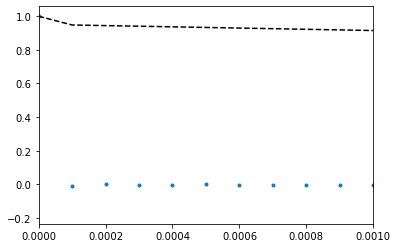

In [88]:

ts=np.arange(0,xyz.shape[0],1)*blocksize*dt
k=16#chrm_top.shape[0]
N=50#int(sim.N/k)
p=10
for d in [1]:
    SXp=[]
    print(tau_p(p,kb,50))
    for pol in range(k):
        # print(pol*N,(pol+1)*N)
        Xp=(1/N)*np.einsum('ijk,j->ik',xyz[:,pol*N:(pol+1)*N,:],np.cos((p*np.pi/N)*(np.arange(1,N+1,1)+0.5)))
        # print(Xp.shape)
        dXp=(Xp[d:,:]-Xp[:-d,:])/(blocksize*dt)
        
        SXp.append(msd_fft(dXp)[1])
    
    SXp=np.mean(np.array(SXp),axis=0)

    plt.semilogx(ts[:-d], SXp/SXp[0],'.')
    # if p==0: continue
    # plt.semilogx(ts,XP_autocorr(t=ts,p1=p,T1=T,F1=F,ta=Ta,k1=kb,Nn=50),'k--')
    plt.plot(ts,[dXp_autocorr(xx,p1=p,T1=T,F1=F,ta=Ta,k1=kb,Nn=50)/dXp_autocorr(0,p1=p,T1=T,F1=F,ta=Ta,k1=kb,Nn=50) for xx in ts],'k--')

# plt.loglog()
plt.xscale('linear')
# print(SXp.shape)
plt.xlim(0,0.001)
# plt.ylim(-100,200)

In [44]:
np.gradient(ts)

array([0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001])

(1e-05, 100.0)

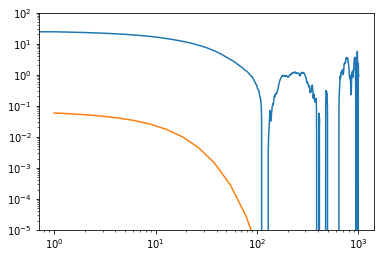

In [14]:
%matplotlib inline
P1=np.array([xyz[:,(xx+1)*50-1,:]-xyz[:,xx*50,:] for xx in range(16)])
# print(P1.shape)
ts=np.arange(0,P1.shape[1],1)
Pav=np.mean([msd_fft(P1[xx])[1] for xx in range(16)],axis=0)
# print(Pav.shape)
plt.loglog(ts,Pav)
plt.loglog(np.logspace(0,3,20),[Rot_corr(xx,1,0,10,10,100) for xx in np.logspace(0,3,20)])

plt.ylim(1e-5,1e2)
# Rot_corr(10,1,1,10,10,100)

In [109]:
T=2e6*100*1e-3
print(tau_p(20,10,100),T/2)

0.025330295910584444 100000.0


In [17]:
import numpy as np
b=np.array([np.array([1,2,3]),np.array([7,2,1])])
b[1]
np.sum(b,axis=0)

array([8, 4, 4])